Wisnu Permana Putra

A11.2020.12598


In [6]:
import pandas as pd
import numpy as np

In [17]:
dataset = pd.read_csv('music.csv')

dataset['Judul_Lagu'] = dataset['Judul_Lagu'].str.replace(r'\d+', '')
dataset['Judul_Lagu'] = dataset['Judul_Lagu'].str.replace(r'[^\w\s]', '')
dataset['Judul_Lagu'] = dataset['Judul_Lagu'].str.lower()
dataset['Judul_Lagu'] = dataset['Judul_Lagu'].str.replace('-', ' ')

# Simpan kembali ke dalam file CSV
dataset.to_csv('music_cleaned.csv', index=False, sep=';')

<ipython-input-17-4867994b8045>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['Judul_Lagu'] = dataset['Judul_Lagu'].str.replace(r'\d+', '')
<ipython-input-17-4867994b8045>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['Judul_Lagu'] = dataset['Judul_Lagu'].str.replace(r'[^\w\s]', '')


In [18]:
print(dataset)

                       Judul_Lagu
0        shape of you  ed sheeran
1        bohemian rhapsody  queen
2    billie jean  michael jackson
3        hotel california  eagles
4         someone like you  adele
..                            ...
64     fight song  rachel platten
65           firework  katy perry
66     eye of the tiger  survivor
67    counting stars  onerepublic
68            perfect  ed sheeran

[69 rows x 1 columns]


In [19]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

dataset_cleaned = pd.read_csv('music.csv', sep=';')

tokenized_list = []

for title in dataset_cleaned['Judul_Lagu']:
    tokens = word_tokenize(title)
    tokenized_list.append(tokens)

dataset_cleaned['Tokens'] = tokenized_list

dataset_cleaned.to_csv('music_with_tokens.csv', index=False, sep=';')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [20]:
dataset_feature = dataset['Judul_Lagu'].astype(str)

In [21]:
dataset_feature

0          shape of you  ed sheeran
1          bohemian rhapsody  queen
2      billie jean  michael jackson
3          hotel california  eagles
4           someone like you  adele
                  ...              
64       fight song  rachel platten
65             firework  katy perry
66       eye of the tiger  survivor
67      counting stars  onerepublic
68              perfect  ed sheeran
Name: Judul_Lagu, Length: 69, dtype: object

In [22]:
dataset.shape

(69, 1)

In [23]:
dataset

,Judul_Lagu
0,shape of you ed sheeran
1,bohemian rhapsody queen
2,billie jean michael jackson
3,hotel california eagles
4,someone like you adele
...,...
64,fight song rachel platten
65,firework katy perry
66,eye of the tiger survivor
67,counting stars onerepublic


TF-IDF

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dataset_feature)
print(X.shape)

(69, 240)


In [27]:
features = vectorizer.get_feature_names_out()
features

array(['abba', 'adele', 'all', 'always', 'are', 'ariana', 'army', 'bad',
       'ball', 'bamba', 'bang', 'be', 'beatles', 'believin', 'bieber',
       'billie', 'billy', 'black', 'bling', 'bob', 'bohemian', 'bon',
       'boogie', 'bowie', 'bradley', 'breath', 'bruno', 'cabello',
       'california', 'camila', 'cant', 'caroline', 'celine', 'chandelier',
       'cheap', 'child', 'chris', 'christina', 'clapton', 'clocks',
       'coldplay', 'cooper', 'counting', 'cyrus', 'daddy', 'dance',
       'dancing', 'david', 'deep', 'despacito', 'diamond', 'dion', 'dire',
       'dont', 'dragons', 'drake', 'dylan', 'eagles', 'earth', 'ed',
       'elton', 'eric', 'every', 'eye', 'feeling', 'fight', 'fire',
       'firework', 'fonsi', 'ft', 'funk', 'gaga', 'garfunkel', 'girls',
       'go', 'grande', 'guns', 'hand', 'happy', 'harry', 'havana', 'haze',
       'heart', 'heaven', 'hendrix', 'hey', 'hips', 'hold', 'hotel',
       'hotline', 'houston', 'humble', 'imagine', 'in', 'it', 'jackson',
       

In [28]:
idfValues = vectorizer.idf_
d = dict(zip(features, 9 - idfValues))
sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)
for i in range(331):
    print(sortedDict[i])

('the', 6.316454115412178)
('ft', 5.830946299630477)
('you', 5.697414907005954)
('of', 5.543264227178696)
('beatles', 5.137799119070531)
('in', 5.137799119070531)
('jackson', 5.137799119070531)
('john', 5.137799119070531)
('justin', 5.137799119070531)
('like', 5.137799119070531)
('man', 5.137799119070531)
('michael', 5.137799119070531)
('rolling', 5.137799119070531)
('adele', 4.850117046618751)
('all', 4.850117046618751)
('bruno', 4.850117046618751)
('dont', 4.850117046618751)
('ed', 4.850117046618751)
('gaga', 4.850117046618751)
('heaven', 4.850117046618751)
('imagine', 4.850117046618751)
('it', 4.850117046618751)
('jean', 4.850117046618751)
('lady', 4.850117046618751)
('mars', 4.850117046618751)
('on', 4.850117046618751)
('queen', 4.850117046618751)
('sheeran', 4.850117046618751)
('sia', 4.850117046618751)
('stop', 4.850117046618751)
('sugar', 4.850117046618751)
('sweet', 4.850117046618751)
('timberlake', 4.850117046618751)
('to', 4.850117046618751)
('will', 4.850117046618751)
('abba

IndexError: ignored

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

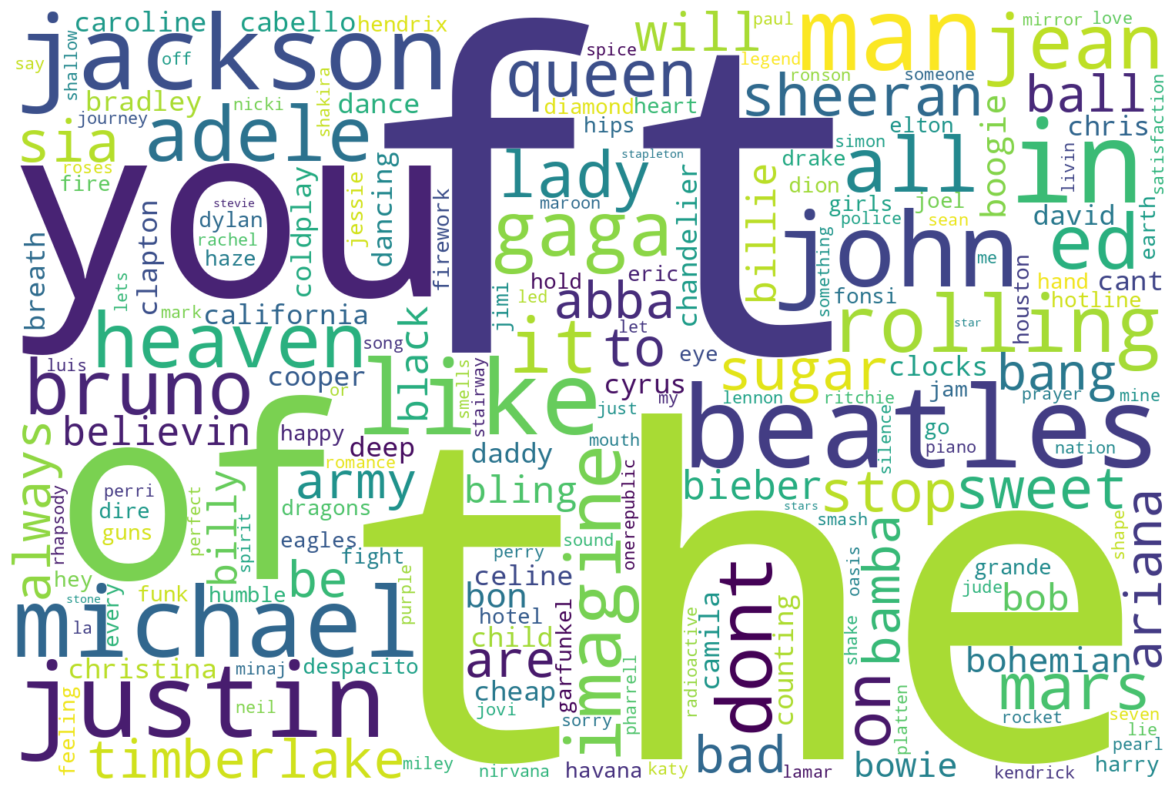

In [30]:
PlotWordCloud(d)